### Minimizing churn rate through financial habit analysis: 

In [25]:
# Importing the necessary libraries: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Extracting the dataset: 
df_original = pd.read_csv('churn_data.csv')
df= df_original.copy()
df.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


#### EDA: Exploratory Data Analysis: 

In [3]:
# Shape of the dataset: 
df.shape

(27000, 31)

In [5]:
# Basic information about the dataset: 
df.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [6]:
# Datatypes of each columns:
df.dtypes

user                         int64
churn                        int64
age                        float64
housing                     object
credit_score               float64
deposits                     int64
withdrawal                   int64
purchases_partners           int64
purchases                    int64
cc_taken                     int64
cc_recommended               int64
cc_disliked                  int64
cc_liked                     int64
cc_application_begin         int64
app_downloaded               int64
web_user                     int64
app_web_user                 int64
ios_user                     int64
android_user                 int64
registered_phones            int64
payment_type                object
waiting_4_loan               int64
cancelled_loan               int64
received_loan                int64
rejected_loan                int64
zodiac_sign                 object
left_for_two_month_plus      int64
left_for_one_month           int64
rewards_earned      

In [8]:
# Checking for nan or missing values: 
df.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [10]:
# Removing the cols credit_score and rewards_earned:
df = df.drop(columns=['credit_score','rewards_earned'])

In [11]:
# Rechecking: 
df.isna().sum()

user                       0
churn                      0
age                        4
housing                    0
deposits                   0
withdrawal                 0
purchases_partners         0
purchases                  0
cc_taken                   0
cc_recommended             0
cc_disliked                0
cc_liked                   0
cc_application_begin       0
app_downloaded             0
web_user                   0
app_web_user               0
ios_user                   0
android_user               0
registered_phones          0
payment_type               0
waiting_4_loan             0
cancelled_loan             0
received_loan              0
rejected_loan              0
zodiac_sign                0
left_for_two_month_plus    0
left_for_one_month         0
reward_rate                0
is_referred                0
dtype: int64

In [17]:
# Identifying the index of nan in housing data: 
df.loc[df.age.isna() == True].index.values

array([ 1714,  3237, 12571, 15722], dtype=int64)

In [19]:
# removing the above rows: 
df = df.drop(index=[1714,  3237, 12571, 15722])

In [20]:
# Recheck:
df.isna().sum()

user                       0
churn                      0
age                        0
housing                    0
deposits                   0
withdrawal                 0
purchases_partners         0
purchases                  0
cc_taken                   0
cc_recommended             0
cc_disliked                0
cc_liked                   0
cc_application_begin       0
app_downloaded             0
web_user                   0
app_web_user               0
ios_user                   0
android_user               0
registered_phones          0
payment_type               0
waiting_4_loan             0
cancelled_loan             0
received_loan              0
rejected_loan              0
zodiac_sign                0
left_for_two_month_plus    0
left_for_one_month         0
reward_rate                0
is_referred                0
dtype: int64

In [21]:
# Confirmation:
df.isna().any()

user                       False
churn                      False
age                        False
housing                    False
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
reward_rate                False
is_referred                False
dtype: bool

In [22]:
## Plotting: 
df.shape

(26996, 29)

In [23]:
# Using a temp dataset for plotting purposes: 
df_temp = df.copy()
df_temp = df_temp.drop(columns = ['user','churn'])
df_temp.columns

Index(['age', 'housing', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'app_web_user',
       'ios_user', 'android_user', 'registered_phones', 'payment_type',
       'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'zodiac_sign', 'left_for_two_month_plus', 'left_for_one_month',
       'reward_rate', 'is_referred'],
      dtype='object')

In [24]:
# Checking the shape for verification: 
df_temp.shape

(26996, 27)

In [28]:
df_temp.head()

,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,37.0,na,0,0,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,28.0,R,0,0,1,0,0,96,0,0,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,35.0,R,47,2,86,47,0,285,0,0,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,26.0,R,26,3,38,25,0,74,0,0,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,27.0,na,0,0,2,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


In [29]:
# Converting the categorical data into int: 
df_temp = pd.get_dummies(df_temp)

In [30]:
df_temp.columns

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'app_web_user',
       'ios_user', 'android_user', 'registered_phones', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'is_referred', 'housing_O', 'housing_R', 'housing_na',
       'payment_type_Bi-Weekly', 'payment_type_Monthly',
       'payment_type_Semi-Monthly', 'payment_type_Weekly', 'payment_type_na',
       'zodiac_sign_Aquarius', 'zodiac_sign_Aries', 'zodiac_sign_Cancer',
       'zodiac_sign_Capricorn', 'zodiac_sign_Gemini', 'zodiac_sign_Leo',
       'zodiac_sign_Libra', 'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius',
       'zodiac_sign_Scorpio', 'zodiac_sign_Taurus', 'zodiac_sign_Virgo',
       'zodiac_sign_na'],
      dtype='object')

In [31]:
# Getting rid of the dummy variable trap:
df_temp = df_temp.drop(columns=['housing_R','payment_type_Weekly','zodiac_sign_Taurus'])

In [32]:
df_temp.shape

(26996, 42)

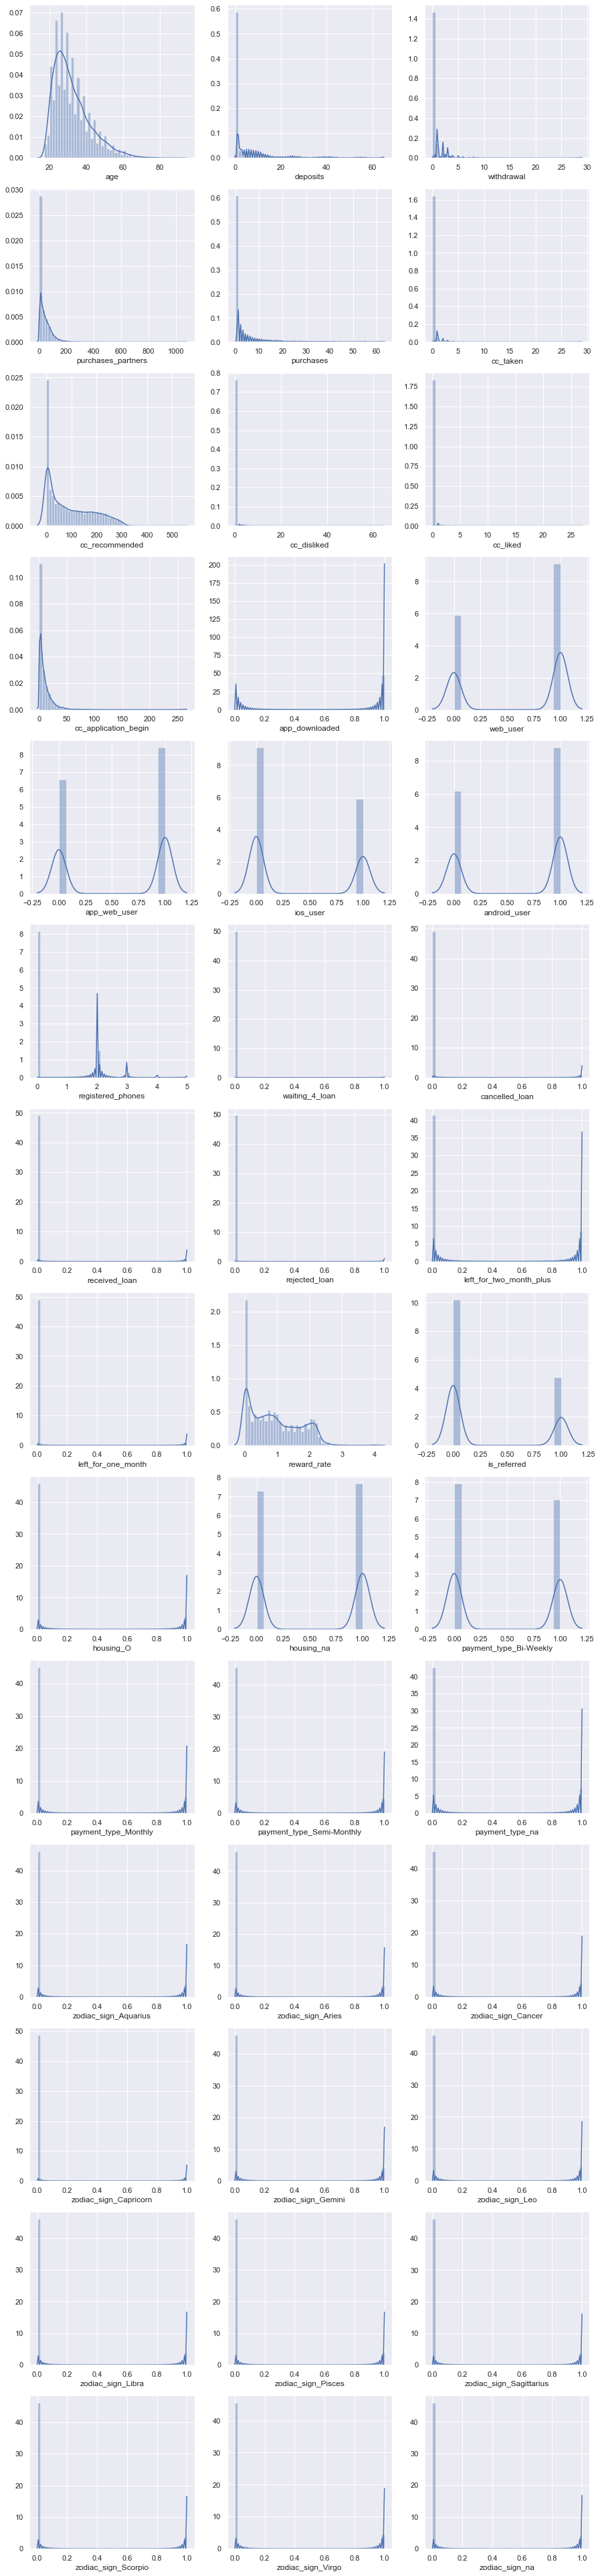

In [38]:
# Plotting: 
sns.set(font_scale=1)
f, axes = plt.subplots(14,3, figsize = (15,70))
col = 0
for i in range(0,14):
    for j in range(0,3):
        if col < 42:
            sns.distplot(df_temp.iloc[:, col], ax = axes[i][j])
            col = col + 1
plt.show()

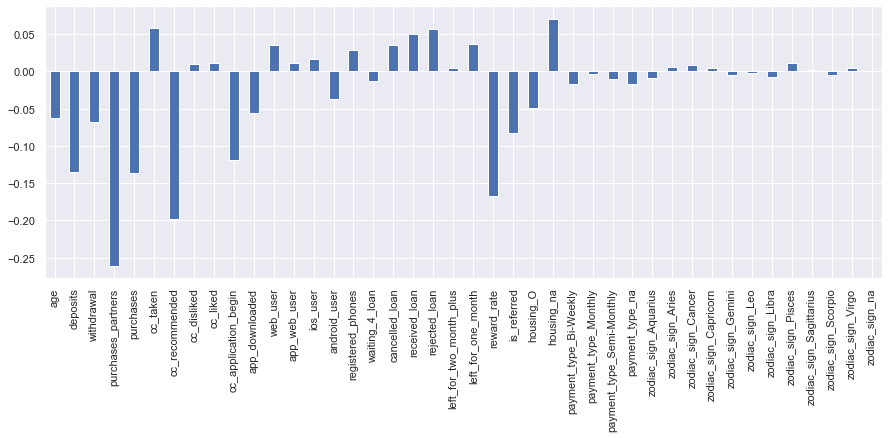

In [44]:
## The correlation plot: 
plt.figure(figsize = (15,5))
df_temp.corrwith(df.churn).plot.bar()
plt.show()

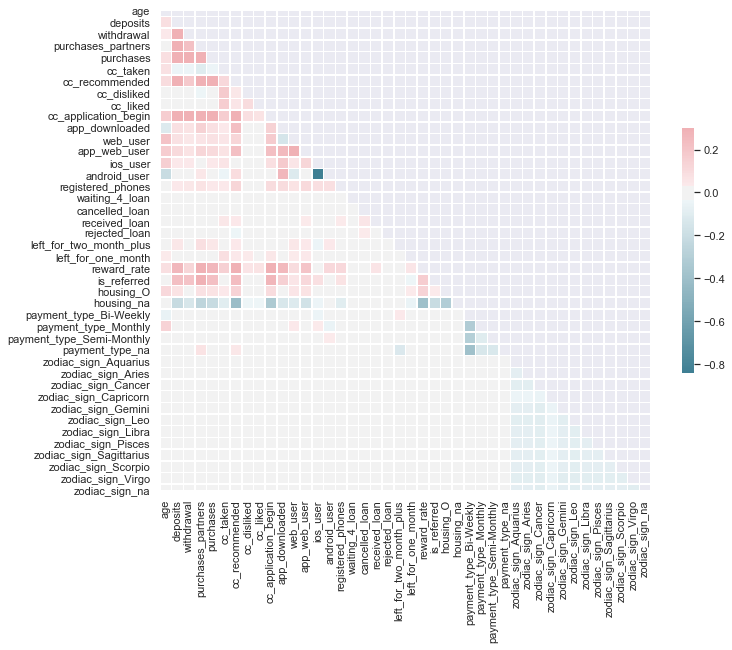

In [45]:
# The correlation matrix: 
# Compute the correlation matrix
corr = df_temp.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [47]:
df_temp.columns

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'app_web_user',
       'ios_user', 'android_user', 'registered_phones', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'is_referred', 'housing_O', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly', 'payment_type_na',
       'zodiac_sign_Aquarius', 'zodiac_sign_Aries', 'zodiac_sign_Cancer',
       'zodiac_sign_Capricorn', 'zodiac_sign_Gemini', 'zodiac_sign_Leo',
       'zodiac_sign_Libra', 'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius',
       'zodiac_sign_Scorpio', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [53]:
# Removing IOS or Android user as they are highly correlated: 
df_temp = df_temp.drop(columns=['ios_user'])

In [54]:
df_temp.shape

(26996, 41)

#### Building the model:

In [55]:
# Defining x and y: 
x = df_temp.copy()
y = df.churn

In [56]:
# Splitting the dataset into testing and training: 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [57]:
# Preprocessing the dataset: 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

##### Building the classifier: 


In [62]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver = 'lbfgs')
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
# Using the model to make the prediction: 
y_pred = classifier.predict(x_test)

In [64]:
# Using the confusion matrix to validate the data: 
# Using the confusion metrix to validate the prediction: 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Correct Prediction:', np.sum(np.diagonal(cm)))
print('Incorrect Prediction:', x_test.shape[0] - np.sum(np.diagonal(cm)))
print('Accuracy:', str(round(accuracy_score(y_test, y_pred),4)*100)+'%')
print('Precision:',str(round(precision_score(y_test, y_pred),4)*100)+'%')

[[2424  730]
 [1205 1041]]
Correct Prediction: 3465
Incorrect Prediction: 1935
Accuracy: 64.17%
Precision: 58.78%


In [65]:
# Applying kfold cross validation: 
from sklearn.model_selection import cross_val_score
kfold = cross_val_score(estimator = classifier, X = x_train, y = y_train, scoring='accuracy', cv = 10)

In [66]:
# Viwing the accuricies: 
kfold

array([0.64212963, 0.66666667, 0.65138889, 0.6587963 , 0.6587963 ,
       0.64212963, 0.65046296, 0.63287037, 0.65940686, 0.65848007])

In [67]:
# Mean accuray: 
round(kfold.mean(),4)

0.6521

#### Feature Selection: 

In [68]:
# Recursive Feature Elimination: 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [71]:
# Creating a new model: 
model = LogisticRegression(solver = 'lbfgs')

In [72]:
# Selecting the best 20 features: 
rfe = RFE(model, 20)
rfe.fit(x_train, y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=20, step=1, verbose=0)

In [73]:
# rfe report: 
rfe.support_

array([ True,  True, False,  True,  True,  True,  True, False, False,
       False, False,  True, False,  True,  True, False,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [74]:
rfe.ranking_

array([ 1,  1,  3,  1,  1,  1,  1, 17, 22,  7,  5,  1,  4,  1,  1, 11,  1,
        1,  1,  2,  1,  1, 12,  1,  1,  1,  1,  1,  1,  6, 13,  8, 10, 21,
       15, 19,  9, 16, 14, 20, 18])

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [77]:
x_train.columns[rfe.support_]

Index(['age', 'deposits', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'web_user', 'android_user', 'registered_phones',
       'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_one_month', 'reward_rate', 'housing_O', 'housing_na',
       'payment_type_Bi-Weekly', 'payment_type_Monthly',
       'payment_type_Semi-Monthly', 'payment_type_na'],
      dtype='object')

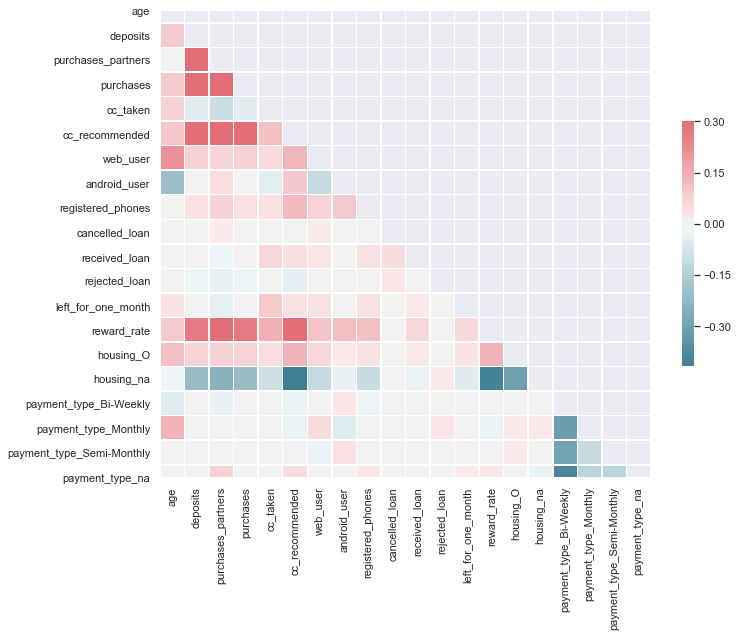

In [82]:
# Plotting the correlaiton of the new colums: 

# Compute the correlation matrix
corr = x_train[x_train.columns[rfe.support_]].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})    

plt.show()

#### Builing model using the newly selected columns: 

In [86]:
# Fitting the above defined model: 
model = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
model.fit(x_train[x_train.columns[rfe.support_]], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
# Making the prediction:
y_pred = model.predict(x_test[x_test.columns[rfe.support_]])

In [89]:
# Using the confusion matrix to validate the data: 
# Using the confusion metrix to validate the prediction: 
#from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Correct Prediction:', np.sum(np.diagonal(cm)))
print('Incorrect Prediction:', x_test.shape[0] - np.sum(np.diagonal(cm)))
print('Accuracy:', str(round(accuracy_score(y_test, y_pred),4)*100)+'%')
print('Precision:',str(round(precision_score(y_test, y_pred),4)*100)+'%')

[[2448  706]
 [1204 1042]]
Correct Prediction: 3490
Incorrect Prediction: 1910
Accuracy: 64.63%
Precision: 59.61%


In [91]:
# Applying kfold cross validation: 
from sklearn.model_selection import cross_val_score
kfold = cross_val_score(estimator = model, X = x_train[x_train.columns[rfe.support_]], y = y_train, scoring='accuracy', cv = 10)

In [93]:
# All the different accuries: 
kfold

array([0.64027778, 0.65972222, 0.65740741, 0.65555556, 0.63842593,
       0.64398148, 0.65416667, 0.6337963 , 0.65384615, 0.65013902])

In [97]:
# Mean accuracy: 
print('Mean Accuracy', str(round(kfold.mean(),4)*100)+'%')

Mean Accuracy 64.87%
